In [72]:
#Importing libraries

#To Handle data
import numpy as np
import pandas as pd

#To Visulize the data
import matplotlib.pyplot as plt
import seaborn as sns


#To preprocess the data
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# #ML task
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Ignore the warning
import warnings
warnings.filterwarnings("ignore")

# Load the dataSet

In [73]:
# Load and see first five rows
df= pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [74]:
# Check the size of the data
df.shape

(101766, 50)

In [75]:
# Check the 
df2=pd.read_csv("IDS_mapping.csv")
df2.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


# 1. Data Preprocessing:
Clean the data (e.g., remove duplicates, handle missing values like ?)   
Convert multi-class target into binary classification:  
Readmitted within 30 days (<30) → 1  
Not readmitted (NO or >30) →   

In [76]:
# Check the statics of data
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [77]:
# Check out the duplicate data
df.duplicated().sum()

0

In [78]:
# Check the missing values
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [79]:
#Handling the missing values
#Check the missing values
print("Percentage of missing value is \n")
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Percentage of missing value is 



max_glu_serum               94.746772
A1Cresult                   83.277322
encounter_id                 0.000000
nateglinide                  0.000000
glimepiride                  0.000000
acetohexamide                0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
tolazamide                   0.000000
examide                      0.000000
citoglipton                  0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
chlorpropamide               0.000000
repaglinide 

In [80]:
df["max_glu_serum"].value_counts()

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [81]:
# Check the unvique values
df["max_glu_serum"].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [82]:
# Cleaning of the max_glu_serum

# Step 1: Clean string values
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    if value.startswith('>'):
        # remove '>' and convert to number slightly higher
        return float(value[1:]) + 10
    elif value.lower() == 'norm':
        # replace 'Norm' with a typical normal value
        return 100.5
    else:
        try:
            return float(value)
        except:
            return np.nan

df['max_glu_serum'] = df['max_glu_serum'].apply(clean_numeric)

# Impute missing numeric values with median
median_value = df['max_glu_serum'].median()
df['max_glu_serum'] = df['max_glu_serum'].fillna(median_value)


In [83]:
df["max_glu_serum"].unique()

array([210. , 310. , 100.5])

In [84]:
# Handling teh A1Cresult column
df["A1Cresult"].value_counts()

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [85]:
df["A1Cresult"].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [86]:
#Function to clean and convert to numeric
def clean_test_result(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    
    if value.startswith('>'):
        # Remove '>' and add a small offset
        return float(value[1:]) + 0.5
    elif value.lower() == 'norm':
        # Replace 'Norm' with a typical normal numeric value
        return 5.5
    else:
        try:
            return float(value)
        except:
            return np.nan

# Apply the cleaning function
df['A1Cresult'] = df['A1Cresult'].apply(clean_test_result)

# Impute missing values with median
median_val = df['A1Cresult'].median()
df['A1Cresult'] = df['A1Cresult'].fillna(median_val)

In [87]:
df["A1Cresult"].unique()

array([7.5, 8.5, 5.5])

In [88]:
## In both column lots of missing data and we do not use for model training

In [89]:
# Data set is cleaned
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

**Convert multi-class target into binary classification:**  
**Readmitted within 30 days (<30) → 1**   
**Not readmitted (NO or >30) → 0**

In [90]:
df.sample()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
7802,36249120,5816808,Caucasian,Female,[50-60),?,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,NO


In [91]:
# Check the weight column
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [92]:
# Function for convert weight in float foramt
def clean_range(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    
    # Handle '>200'
    if value.startswith('>'):
        return 200.5
    
    # Handle '[a-b)' format
    if value.startswith('[') and '-' in value:
        try:
            low, high = value.strip('[]').replace(')', '').split('-')
            low, high = float(low), float(high)
            # Return midpoint
            return (low  + high) / 2
        except:
            return np.nan
    
    # Otherwise, unknown format
    return np.nan

# Apply cleaning
df['weight'] = df['weight'].apply(clean_range)

# Impute missing if necessary (median)
median_val = df['weight'].median()
df['weight'] = df['weight'].fillna(median_val)

In [93]:
# Check the weight column
df.weight.unique()

array([ 87.5,  62.5,  12.5, 112.5,  37.5, 137.5, 187.5, 162.5, 200.5])

In [94]:
# Handle the age column
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [95]:
def clean_range(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    
    # Handle '[a-b)' format
    if value.startswith('[') and '-' in value:
        try:
            low, high = value.strip('[]').replace(')', '').split('-')
            low, high = float(low), float(high)
            # Return midpoint
            return (low + high) / 2
        except:
            return np.nan
    
    return np.nan

# Apply cleaning
df['age'] = df['age'].apply(clean_range)

In [96]:
df.age.unique()

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [97]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
68027,191453748,101965302,Caucasian,Female,75.0,87.5,5,3,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
34942,108736374,84606228,Caucasian,Female,75.0,87.5,3,3,6,3,...,No,No,No,No,No,No,No,No,Yes,>30
58405,165526488,39970044,AfricanAmerican,Female,55.0,87.5,2,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
21443,74728692,114717375,Caucasian,Male,35.0,87.5,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
13789,54387444,76359492,Caucasian,Male,75.0,87.5,1,11,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [98]:
# Some columns has the ? till replace
# Replace all "?" in the entire DataFrame with NaN
df = df.replace('?', np.nan)

# Separate numeric and categorical columns 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Create imputers
num_imputer = SimpleImputer(strategy='median')      
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Chek the missing values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Convert the text into number

In [99]:
# check the data types
df.dtypes

encounter_id                float64
patient_nbr                 float64
race                         object
gender                       object
age                         float64
weight                      float64
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum               float64
A1Cresult                   float64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [100]:
# Convert to text into number
df['readmitted'] = df['readmitted'].replace({
    '<30': 1,
    '>30': 0,
    'NO': 0
})

In [101]:
# Applies labelencoder on object column

label_encoder = LabelEncoder()

cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
#check the last five rows
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548.0,100162476.0,0,1,75.0,87.5,1.0,3.0,7.0,3.0,...,0,0,1,0,0,0,0,0,1,0
101762,443847782.0,74694222.0,0,0,85.0,87.5,1.0,4.0,5.0,5.0,...,0,2,1,0,0,0,0,1,1,0
101763,443854148.0,41088789.0,2,1,75.0,87.5,1.0,1.0,7.0,1.0,...,0,0,1,0,0,0,0,0,1,0
101764,443857166.0,31693671.0,2,0,85.0,87.5,2.0,3.0,7.0,10.0,...,0,3,1,0,0,0,0,0,1,0
101765,443867222.0,175429310.0,2,1,75.0,87.5,1.0,1.0,7.0,6.0,...,0,1,1,0,0,0,0,1,0,0


# 2. Exploratory Data Analysis (EDA):  
Understand relationships between readmission and key features (e.g., age, number of medications, diagnosis codes)
Identify high-risk groups visually and statistically

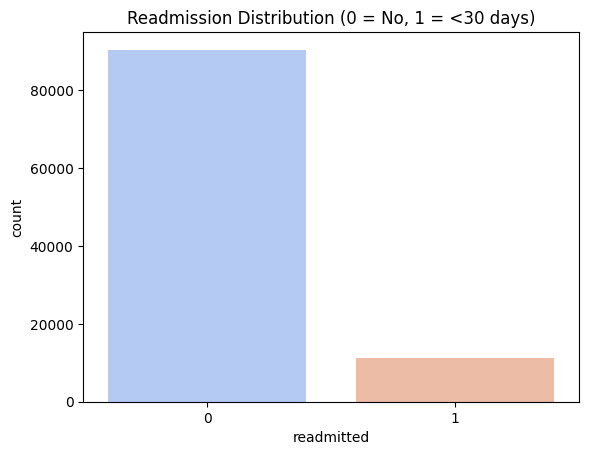

Readmission Rate (<30 days): 11.16%


In [102]:
# Understand the target column
sns.countplot(x='readmitted', data=df, palette='coolwarm')
plt.title("Readmission Distribution (0 = No, 1 = <30 days)")
plt.show()

# Percentage
readmit_rate = df['readmitted'].mean() * 100
print(f"Readmission Rate (<30 days): {readmit_rate:.2f}%")

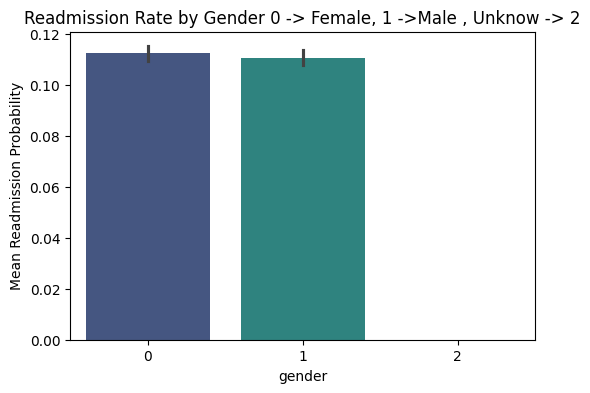

In [103]:
# Gender Vs readmitted
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='readmitted', data=df, palette='viridis')
plt.title("Readmission Rate by Gender 0 -> Female, 1 ->Male , Unknow -> 2")
plt.ylabel("Mean Readmission Probability")
plt.show()


In [104]:
df.gender.value_counts()

gender
0    54708
1    47055
2        3
Name: count, dtype: int64

In [105]:
# Remove the 2 category because Statistically meaningless and add noise
df.gender.value_counts()

gender
0    54708
1    47055
2        3
Name: count, dtype: int64

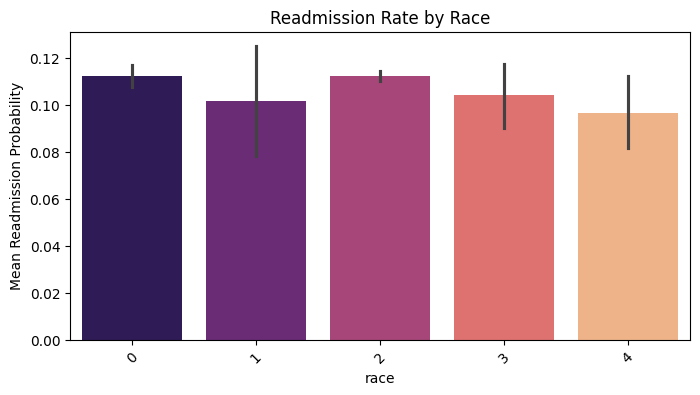

race
2    78372
0    19210
3     2037
4     1506
1      641
Name: count, dtype: int64

In [106]:
# Race vs Readmission
plt.figure(figsize=(8,4))
sns.barplot(x='race', y='readmitted', data=df, estimator='mean', palette='magma')
plt.title("Readmission Rate by Race")
plt.ylabel("Mean Readmission Probability")
plt.xticks(rotation=45)
plt.show()

df.race.value_counts()

In [107]:
#Get the min, max vlue (diag_1 column) 
df.diag_1.mode()


0    276
Name: diag_1, dtype: int32

diag_1_category
Other              52263
Infectious         12563
Digestive          10973
Circulatory         9179
Neoplasms           8594
Respiratory         7613
Genitourinary        529
Diabetes              30
Musculoskeletal       22
Name: count, dtype: int64


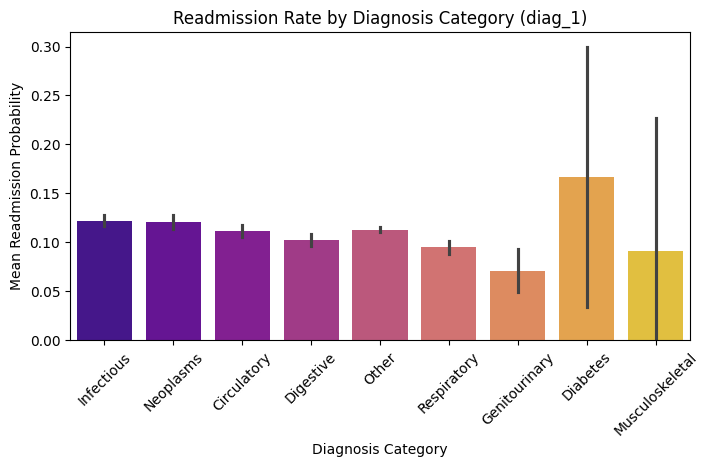

In [108]:
"""
max 715
min 0
mean 336.76
mode 0 276 
"""
def categorize_diag_code(value):
    try:
        if 390 <= value <= 459 or value == 785:
            return 'Circulatory'
        elif 460 <= value <= 519 or value == 786:
            return 'Respiratory'
        elif 520 <= value <= 579 or value == 787:
            return 'Digestive'
        elif 250 <= value < 251:
            return 'Diabetes'
        elif 800 <= value <= 999:
            return 'Injury'
        elif 710 <= value <= 739:
            return 'Musculoskeletal'
        elif 580 <= value <= 629 or value == 788:
            return 'Genitourinary'
        elif 140 <= value <= 239:
            return 'Neoplasms'
        elif 1 <= value < 139:
            return 'Infectious'
        else:
            return 'Other'
    except:
        return 'Other'

# categorization by apply function
df['diag_1_category'] = df['diag_1'].apply(categorize_diag_code)

# Display top 10 counts
print(df['diag_1_category'].value_counts())

plt.figure(figsize=(8,4))
sns.barplot(x='diag_1_category', y='readmitted', data=df, estimator='mean', palette='plasma')
plt.title("Readmission Rate by Diagnosis Category (diag_1)")
plt.ylabel("Mean Readmission Probability")
plt.xlabel("Diagnosis Category")
plt.xticks(rotation=45)
plt.show()


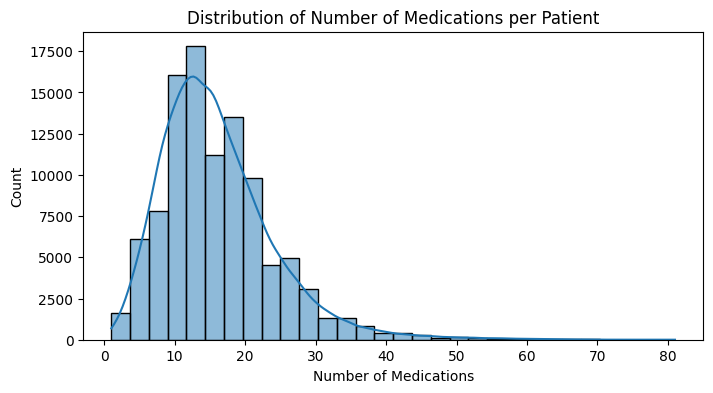

In [109]:
plt.figure(figsize=(8,4))
sns.histplot(df['num_medications'], bins=30, kde=True)
plt.title("Distribution of Number of Medications per Patient")
plt.xlabel("Number of Medications")
plt.ylabel("Count")
plt.show()


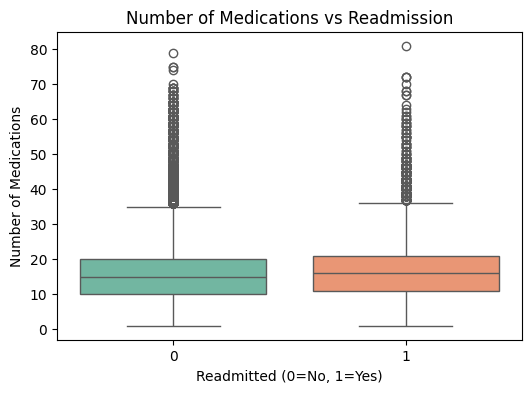

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')
plt.title("Number of Medications vs Readmission")
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Number of Medications")
plt.show()

# Feature Engineering

In [111]:
# Determine threshold (75th percentile)
poly_threshold = df['num_medications'].quantile(0.75)

# Create binary indicator
df['polypharmacy'] = (df['num_medications'] > poly_threshold).astype(int)


print(df['polypharmacy'].value_counts())

print("1 → High medication load (polypharmacy)")

print("0 → Normal medication load")


polypharmacy
0    77886
1    23880
Name: count, dtype: int64
1 → High medication load (polypharmacy)
0 → Normal medication load


In [112]:
# Combine all types of past hospital encounters
df['total_past_admissions'] = (
    df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
)

def admission_risk(x):
    if 1 <= x <= 10:
        return 'Low'
    elif 11 <= x <= 20:
        return 'Medium'
    else:
        return 'High'

df['admission_risk_level'] = df['total_past_admissions'].apply(admission_risk)

print(df['admission_risk_level'].value_counts())



admission_risk_level
High      55934
Low       44948
Medium      884
Name: count, dtype: int64


In [113]:
# Define function to map diagnosis codes to chronic illness categories
def categorize_diag_code(value):
    try:
        if 390 <= value <= 459 or value == 785:
            return 'Circulatory'
        elif 460 <= value <= 519 or value == 786:
            return 'Respiratory'
        elif 250 <= value < 251:
            return 'Diabetes'
        else:
            return 'Other'
    except:
        return 'Other'


df['diag_1_category'] = df['diag_1'].apply(categorize_diag_code)

# Create a chronic illness flag (1 if chronic, else 0)
df['chronic_illness_flag'] = df['diag_1_category'].isin(['Diabetes', 'Circulatory', 'Respiratory']).astype(int)


print(df[['diag_1', 'diag_1_category', 'chronic_illness_flag']].head())


   diag_1 diag_1_category  chronic_illness_flag
0     124           Other                     0
1     143           Other                     0
2     454     Circulatory                     1
3     554           Other                     0
4      54           Other                     0


number_inpatient            0.165147
total_past_admissions       0.126114
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
polypharmacy                0.028426
diabetesMed                 0.027125
num_lab_procedures          0.020364
number_outpatient           0.018893
age                         0.017634
diag_3                      0.011904
repaglinide                 0.010433
patient_nbr                 0.007893
admission_source_id         0.005820
max_glu_serum               0.005171
payer_code                  0.002836
insulin                     0.002608
A1Cresult                   0.002603
diag_2                      0.002600
glipizide                   0.000370
nateglinide                 0.000116
Name: readmitted, dtype: float64


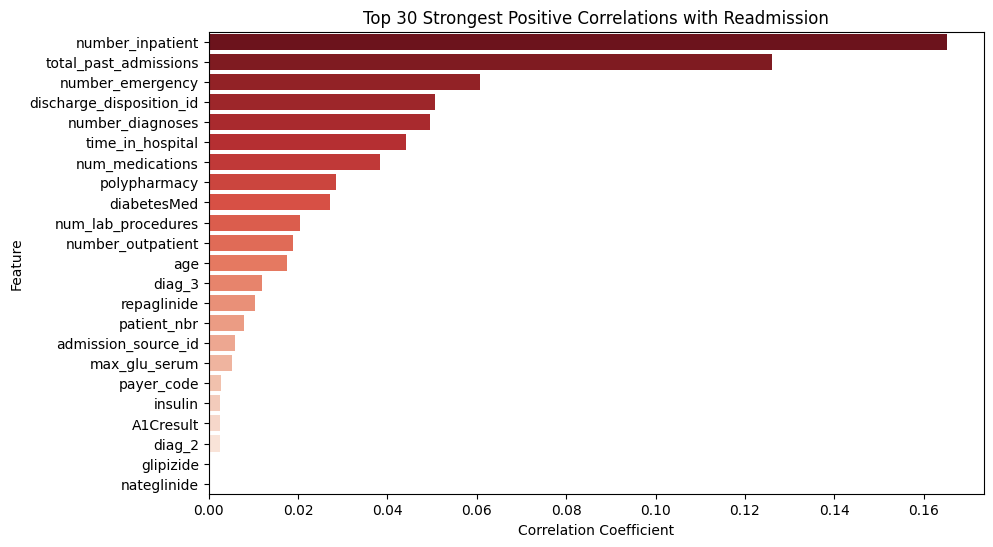

In [114]:
corr = df.select_dtypes(include="number").corr()

target_corr = corr['readmitted']

# Filter only positive correlations
positive_corr = target_corr[target_corr > 0].sort_values(ascending=False)

# Show top 30 strongest positive correlations 
top_positive = positive_corr.drop('readmitted', errors='ignore').head(30)


print(top_positive)

# Visualize top positive correlations
plt.figure(figsize=(10,6))
sns.barplot(x=top_positive.values, y=top_positive.index, palette="Reds_r")
plt.title("Top 30 Strongest Positive Correlations with Readmission")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

In [115]:
# According problem and correlation with readdimed I selected the import column for model feaures.
df = df[[
    'total_past_admissions', 'admission_risk_level',
    'number_emergency', 'number_diagnoses', 'time_in_hospital',
    'num_medications', 'polypharmacy', 'diabetesMed', 'num_lab_procedures',
    'number_outpatient', 'age','readmitted'
]]
 
df.shape

(101766, 12)

In [116]:
df.sample()

,total_past_admissions,admission_risk_level,number_emergency,number_diagnoses,time_in_hospital,num_medications,polypharmacy,diabetesMed,num_lab_procedures,number_outpatient,age,readmitted
66470,0.0,High,0.0,9.0,8.0,24.0,1,0,76.0,0.0,85.0,0


In [117]:
# Applies labelencoder on object column

label_encoder = LabelEncoder()

cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
#check the last 2 rows
df.tail(2)

,total_past_admissions,admission_risk_level,number_emergency,number_diagnoses,time_in_hospital,num_medications,polypharmacy,diabetesMed,num_lab_procedures,number_outpatient,age,readmitted
101764,1.0,1,0.0,9.0,10.0,21.0,1,1,45.0,0.0,85.0,0
101765,0.0,0,0.0,9.0,6.0,3.0,0,0,13.0,0.0,75.0,0


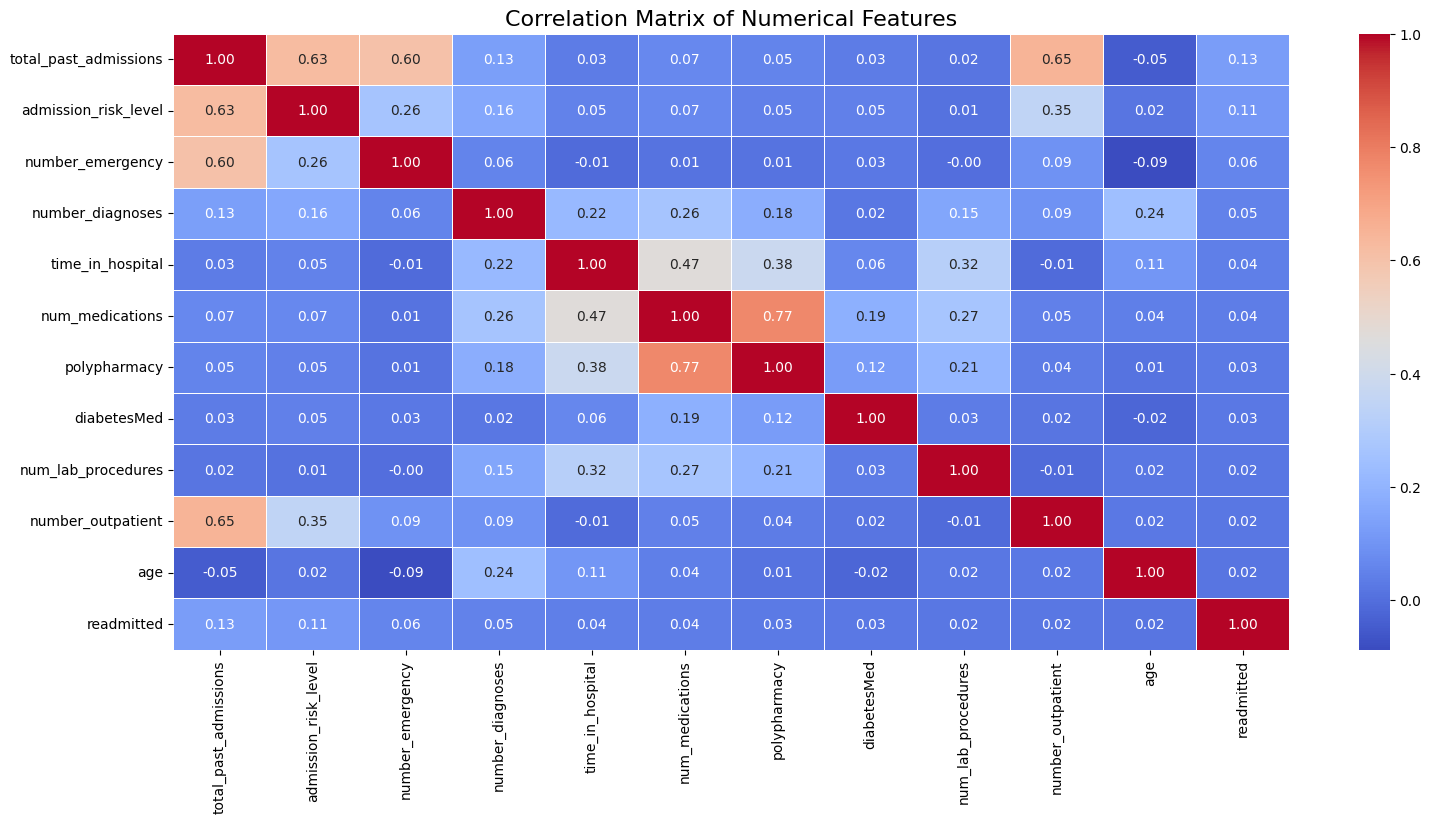

In [118]:
fig, ax = plt.subplots(figsize=(18, 8))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
ax.set_title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# Modeling

In [146]:
X=df.drop(["readmitted"],axis=1)
Y=df["readmitted"]

#Train test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#Build the model
model=RandomForestClassifier( 
    random_state=42,
    n_estimators=500,
    
    class_weight={0: 1, 1: 5}
    
    )

#Train the model
model.fit(X_train,Y_train)

#Predict the model 

Y_pred=model.predict(X_test)

In [148]:
#Evaluate the model or check the accuracy of model
print(f"accuracy_score = {accuracy_score(Y_test,Y_pred)}")
print(f"Classification report \n= {classification_report(Y_test,Y_pred)}")

accuracy_score = 0.8797657416869743
Classification report 
=               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22593
           1       0.17      0.02      0.04      2849

    accuracy                           0.88     25442
   macro avg       0.53      0.50      0.49     25442
weighted avg       0.81      0.88      0.84     25442



In [150]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)


In [151]:
model.fit(X_res, Y_res)


RandomForestClassifier(class_weight={0: 1, 1: 5}, n_estimators=500,
                       random_state=42)

In [155]:
#Evaluate the model or check the accuracy of model
print(f"accuracy_score = {accuracy_score(Y_test,Y_pred)}")
print(f"Classification report \n= {classification_report(Y_test,Y_pred)}")

accuracy_score = 0.8715509786966433
Classification report 
=               precision    recall  f1-score   support

           0       0.89      0.98      0.93     22593
           1       0.16      0.03      0.06      2849

    accuracy                           0.87     25442
   macro avg       0.52      0.51      0.49     25442
weighted avg       0.81      0.87      0.83     25442



In [152]:
#Predict the model 
Y_pred=model.predict(X_test)

ROC-AUC Score = 0.5624


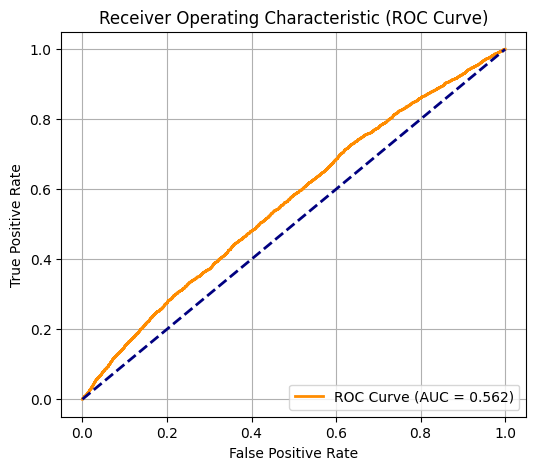

In [154]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, xgb.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score = {roc_auc:.4f}")

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, xgb.predict_proba(X_test)[:, 1])

# Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


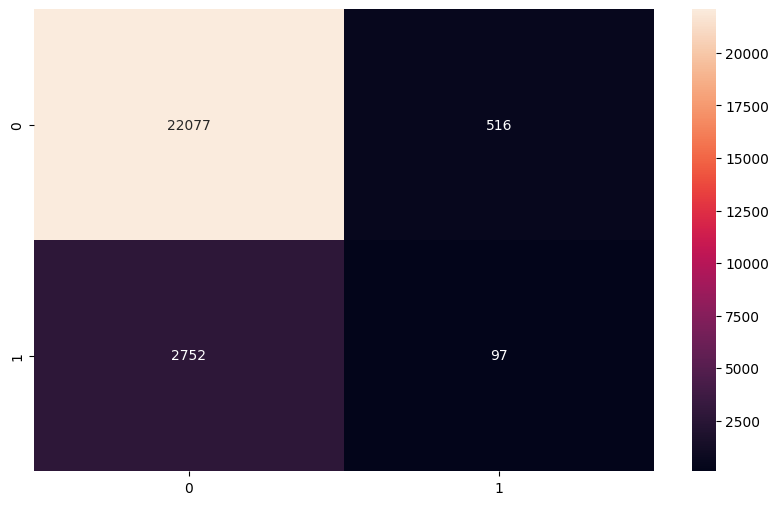

In [153]:
#plot the heat map
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")
plt.show()

In [124]:
predication =model.predict([[3.0, 1, 0.0, 6.0, 2.0, 13.0, 0, 1, 11.0, 2.0, 25.0]]
)
print(predication)
if predication == 0:
    print("Not readmitted")
else:
    print("readmitted")

[0]
Not readmitted


# XGBoost

In [126]:
from xgboost import XGBClassifier
xgb=xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.07,
    max_depth=20,
    subsample=0.8,
    colsample_bytree=0.7,
    scale_pos_weight=(Y.value_counts()[0] / Y.value_counts()[1]),
    random_state=42
)
xgb.fit(X_train,Y_train)

Y_pred=xgb.predict(X_test)

ROC-AUC Score = 0.5624


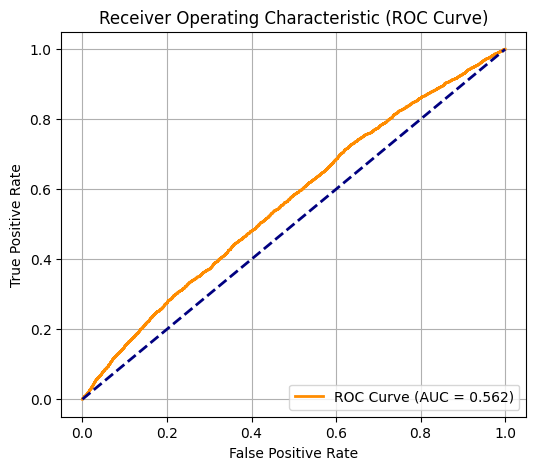

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, xgb.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score = {roc_auc:.4f}")

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, xgb.predict_proba(X_test)[:, 1])

# Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [135]:

#Evaluate the model or check the accuracy of model
print(f"accuracy_score = {accuracy_score(Y_test,Y_pred)}")
print(f" Classification report \n= {classification_report(Y_test,Y_pred)}")

accuracy_score = 0.8787461923946153
 Classification report 
=               precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.15      0.02      0.03      2285

    accuracy                           0.88     20354
   macro avg       0.52      0.50      0.48     20354
weighted avg       0.81      0.88      0.83     20354



In [133]:
predication =model.predict([[3.0, 1, 0.0, 6.0, 2.0, 13.0, 0, 1, 11.0, 2.0, 25.0]])
print(predication)
if predication == 0:
    print("Not readmitted")
else:
    print("readmitted")


[0]
Not readmitted


In [141]:
import pickle

with open("xgb_readmission_model.pkl", "wb") as f:
    pickle.dump(xgb, f)



In [129]:
X=df.drop(["readmitted"],axis=1)
Y=df["readmitted"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Build the model
logist=LogisticRegression()

#Train the model
model.fit(X_train,Y_train)

#Predict the model

Y_pred=model.predict(X_test)


In [130]:

#Evaluate the model or check the accuracy of model

print(f"accuracy_score = {accuracy_score(Y_test,Y_pred)}")
print(f" Classification report \n= {classification_report(Y_test,Y_pred)}")

accuracy_score = 0.8787461923946153
 Classification report 
=               precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.15      0.02      0.03      2285

    accuracy                           0.88     20354
   macro avg       0.52      0.50      0.48     20354
weighted avg       0.81      0.88      0.83     20354

